In [1]:
# !pip install spinesTS
import sys
sys.path.append('..')

# MLPTorchModel

In [2]:
from spinesTS.preprocessing import split_series
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score

In [3]:
from spinesTS.data import BuiltInSeriesData
from spinesTS.nn import *
from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error

In [4]:
series_data = BuiltInSeriesData()

+----+----------------------+----------------------------------------------+
|    | table's name         | table's columns                              |
+----+----------------------+----------------------------------------------+
|  0 | ETTh1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  1 | ETTh2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  2 | ETTm1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  3 | ETTm2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  4 | Electric_Production  | date, value                                  |
|  5 | Messages_Sent        | date, ta, tb, tc                             |
|  6 | Messages_Sent_Hour   | date, hour, ta, tb, tc                       |
|  7 | Series_0             | date, timepoint, turnover_1, turnover_2      |
|  8 | Series_1             | date, timepoint, turnover_1, turnover_2      |
|  9 | Series_2             | date, timepoint, turnover_1, turnover_2      |

In [5]:
cs = series_data[0]
cs_data = cs.dataset['OT']
x_train, x_test, y_train, y_test = split_series(cs_data, cs_data, 48, 24, train_size=0.9)

In [6]:
x_train.shape, x_test.shape

((15614, 48), (1735, 48))

## RecurrentWeightedDenseNet

### one res_dense_blocks

Epoch 1/1000 
488/488 - p0 - loss: 1.1042 - mae: 2.0962 - val_loss: 0.9746 - val_mae: 1.3843 - 20.67s/epoch - 0.042s/step
Epoch 2/1000 
488/488 - p0 - loss: 1.6224 - mae: 1.8681 - val_loss: 0.8383 - val_mae: 1.2491 - 20.56s/epoch - 0.042s/step
Epoch 3/1000 
488/488 - p1 - loss: 1.1830 - mae: 1.8408 - val_loss: 0.8442 - val_mae: 1.2459 - 20.39s/epoch - 0.042s/step
Epoch 4/1000 
488/488 - p2 - loss: 1.1532 - mae: 1.8323 - val_loss: 0.8499 - val_mae: 1.2587 - 20.58s/epoch - 0.042s/step
Epoch 5/1000 
488/488 - p0 - loss: 1.2197 - mae: 1.8311 - val_loss: 0.7945 - val_mae: 1.1912 - 20.19s/epoch - 0.041s/step
Epoch 6/1000 
488/488 - p1 - loss: 1.0989 - mae: 1.8289 - val_loss: 0.8360 - val_mae: 1.2360 - 20.34s/epoch - 0.042s/step
Epoch 7/1000 
488/488 - p2 - loss: 1.2089 - mae: 1.8184 - val_loss: 0.8114 - val_mae: 1.2045 - 20.38s/epoch - 0.042s/step
Epoch 8/1000 
488/488 - p3 - loss: 1.3071 - mae: 1.8092 - val_loss: 0.8105 - val_mae: 1.2157 - 20.25s/epoch - 0.042s/step
Epoch 9/1000 
488/488 - 

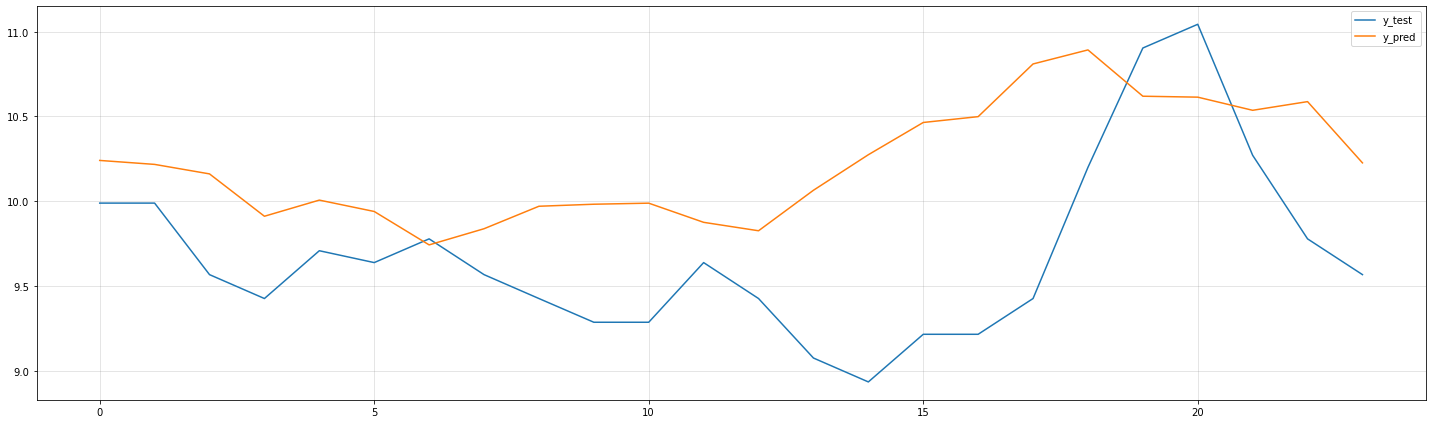

In [7]:
wdr = WeightedDenseRNN(48, 24, random_seed=42, level=2, learning_rate=0.01)
wdr.fit(x_train, y_train, eval_set=(x_test[:-2], y_test[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=True, lr_scheduler='ReduceLROnPlateau')
y_pred_cs = wdr.predict(x_test[-2:])
print(f"r2: {r2_score(y_test[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test[-2:], y_pred_cs)}")
a = plot2d(y_test[-2:], y_pred_cs, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

In [8]:
# r2: -1.6069860851397684
# mae: 94.37355222247896
# mape: 0.7744099343990346

In [9]:
# r2: -0.2951417932046846
# mae: 72.0731291384924
# mape: 0.49534329867232824

In [10]:
# wdr.model.state_dict()

In [11]:
# wdr = GAUNet(48, 24, random_seed=42, flip_features=False, learning_rate=0.01)
# wdr.fit(x_train, y_train, eval_set=(x_test[:-2], y_test[:-2]), batch_size=32,
#              min_delta=0, patience=100, epochs=1000, verbose=True, lr_scheduler='ReduceLROnPlateau')
# y_pred_cs = wdr.predict(x_test[-2:])
# print(f"r2: {r2_score(y_test[-2:].T, y_pred_cs.T)}")
# print(f"mae: {mean_absolute_error(y_test[-2:], y_pred_cs)}")
# print(f"mape: {mean_absolute_percentage_error(y_test[-2:], y_pred_cs)}")
# a = plot2d(y_test[-2:], y_pred_cs, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

In [12]:
# r2: -0.3864792376545837
# mae: 79.12119703974042
# mape: 0.5604488876406167